# Hare and Lynx

## Population Dynamics

### Model Equations

$$\begin{align*}
\frac{dH}{dt} & = r H \left(1-\frac{H}{k}\right) - \frac{a H L}{c + H} \\
\frac{dL}{dt} & = b\frac{a H L}{c + H} - dL
\end{align*}$$

### Parameter Values

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# default parameter values
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

# differential equations
def deriv(X,t,a,b,c,d,k,r):
    H,L = X
    Hdot =  r*H*(1-H/k) - a*H*L/(c+H)
    Ldot = b*a*H*L/(c+H) - d*L
    return [Hdot,Ldot]

# visualization
def HLPlot(t,sol,params):
    a,b,c,d,k,r = params
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(t,sol)
    plt.subplot(122)
    plt.plot(sol[:,0],sol[:,1])
    plt.xlim(0,130)
    plt.ylim(0,130)
    plt.title('Hare/Lynx Phase Plane')
    plt.xlabel('Hare')
    plt.ylabel('Lynx')
    
    Hp = np.linspace(0,k)
    Lp = r*(1-Hp/k)*(c+Hp)/a
    plt.plot(Hp,Lp)
    
    Hd = c*d/(a*b-d)
    plt.plot([Hd,Hd],plt.ylim())

# perform simulation
def LynxHare(H=20,L=20,a=3.2):
    params = (a,b,c,d,k,r)
    IC = [H,L]
    t = np.linspace(0,70,500)
    sol = odeint(deriv,IC,t,args=params)
    HLPlot(t,sol,params)

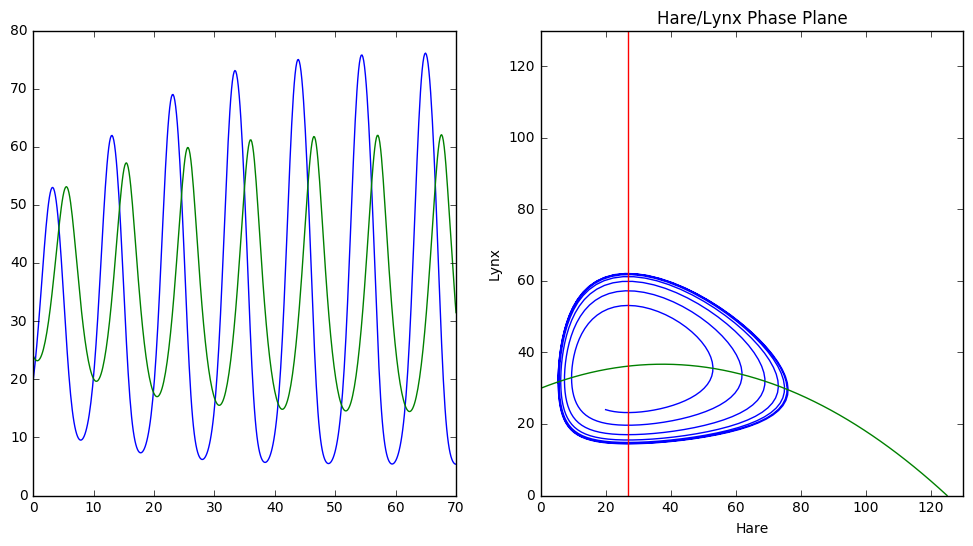

In [33]:
interact(LynxHare, H = (0,80,1), L =(0,80,1), a=(1.0,4.0,0.01));